In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)

import support_modeling as sp  


In [2]:
df=pd.read_pickle("../results/df_encoded_balanced.pkl")
df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel,Department,EducationField,JobLevel,MaritalStatus,StockOptionLevel,TrainingTimesLastYear,...,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
0,3.0,4.0,2.0,2.0,0.151844,0.163752,1.0,0.120690,0.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,2.0,4.0,3.0,0.154691,0.163752,1.0,0.260331,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.0,2.0,1.0,3.0,0.154691,0.111157,4.0,0.120690,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,4.0,3.0,1.0,0.154691,0.163752,3.0,0.120690,3.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1.0,3.0,2.0,0.154691,0.166667,1.0,0.260331,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
variable_dependiente="Attrition"
modelo = sp.AnalisisModelosClasificacion(df, variable_dependiente)

In [4]:
modelo_elegido="random_forest"

In [5]:
logistic_regression_model=modelo.ajustar_modelo(modelo_elegido)

C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
301 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

In [6]:
modelo.calcular_metricas(modelo_elegido)

,train,test
accuracy,1.0,0.925926
precision,1.0,0.935002
recall,1.0,0.925926
f1,1.0,0.925875
kappa,1.0,0.852564
auc,1.0,0.980023


El modelo tiene un excelente desempeño en train (~96%), pero cae en test (~84-86%), lo que indica posible sobreajuste. Para mejorar la generalización, deberíamos ajustar la complejidad del modelo aplicando regularización o simplificación. Aun asi son bastante buenas metricas.

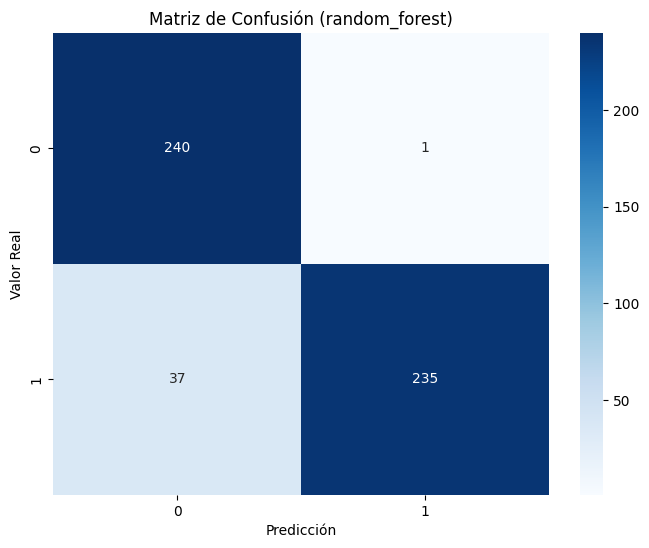

In [7]:
modelo.plot_matriz_confusion(modelo_elegido)

Esto refleja un buen desempeño general del modelo, con una baja cantidad de errores en ambas clases. Sin embargo, los falsos negativos (30) podrían ser relevantes según el contexto del problema, y tal vez debamos analizar si priorizamos la sensibilidad.

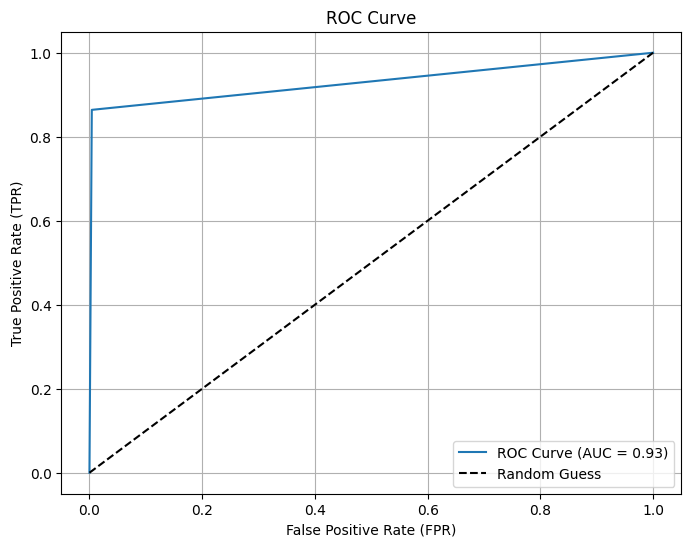

In [8]:
modelo.hacer_roc_curve(modelo_elegido)

c:\Users\alexc\Desktop\GIT\Proyecto8-Employee_Predictor\notebooks\../src\support_modeling.py:214: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


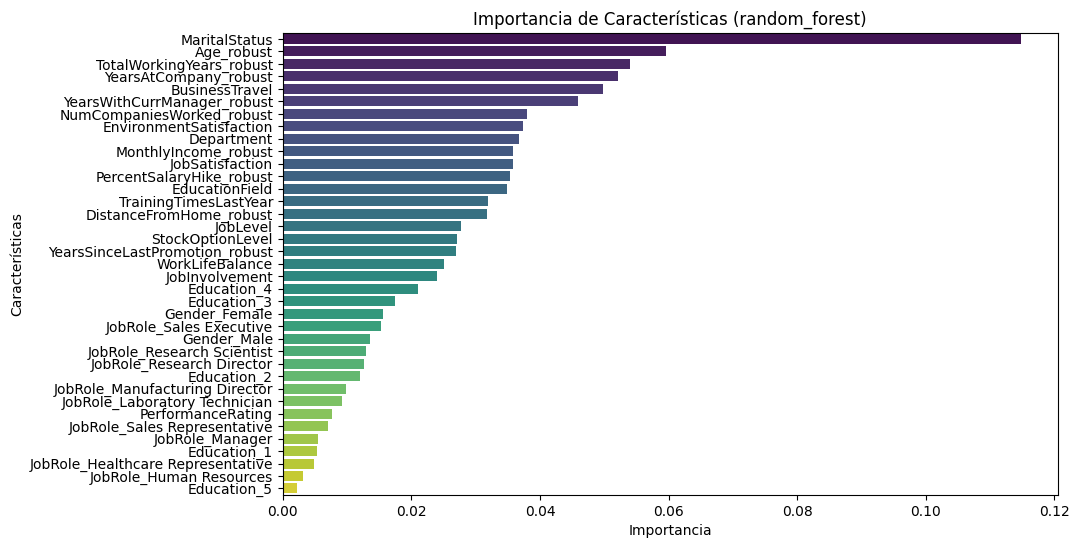

In [9]:
modelo.importancia_predictores(modelo_elegido)

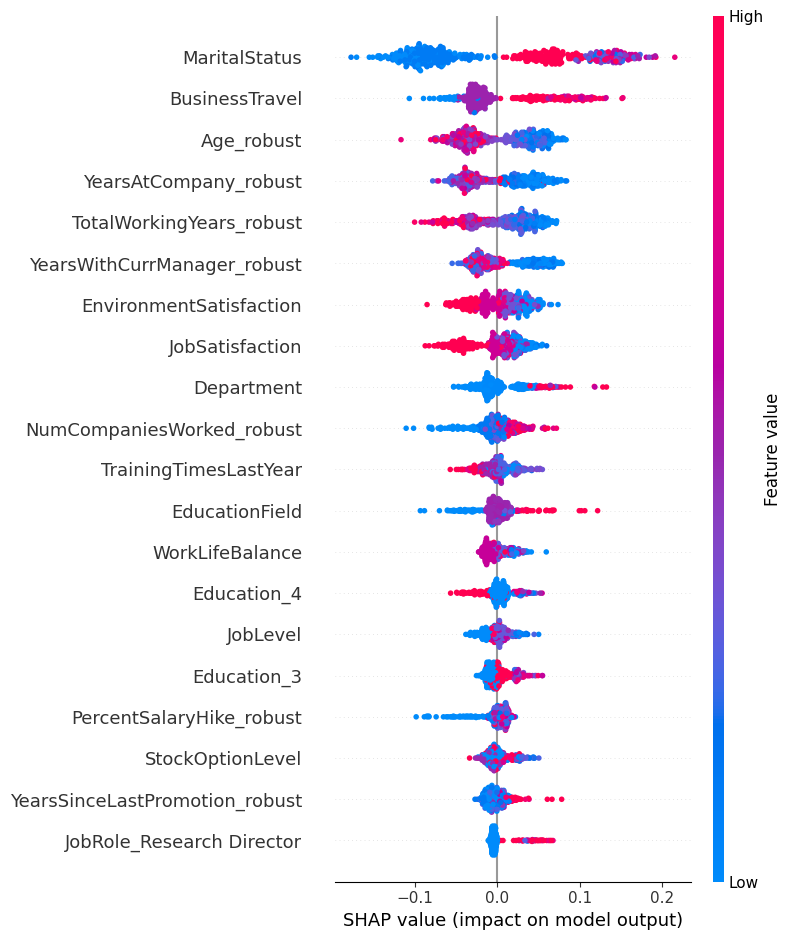

In [10]:
modelo.plot_shap_summary(modelo_elegido)